In [1]:
import pandas as pd
import re
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
os.chdir('C:\\Users\\david\\Desktop\\IMCOM2025\\data\\raw_data')


In [23]:
files = os.listdir()
path = os.getcwd()

In [24]:
df_list = []

# Loop through the files and read them into pandas dataframes
for file in files:
    file_path = os.path.join(path, file)
    df = pd.read_csv(file_path)
    df_list.append(df)

# Concatenate all dataframes
combined_df = pd.concat(df_list, ignore_index=True)

# Shuffle the combined dataframe
sdf = combined_df.sample(frac=1).reset_index(drop=True)
sdf

,contents,star,agree,date
0,It's funny and boring at the same time we'll ...,5,0,2017-01-01 11:30:36
1,its the funniest game,5,0,2019-02-02 23:14:46
2,This is such a good game,5,0,2020-06-02 20:43:57
3,Its very helpful and great educational,5,4,2017-01-22 02:12:30
4,I love this app because I can learn from it,5,0,2018-09-23 00:11:41
...,...,...,...,...
368685,"Great UI, sometimes useful for picking up a ne...",2,9,2022-07-23 07:47:21
368686,I loved the previous version and could track m...,1,2,2022-11-26 15:32:47
368687,Good to have when you need to get familiar wit...,4,1,2024-05-11 05:33:42
368688,Brilliant for learning a new language at your ...,4,0,2022-08-27 19:12:39


In [25]:
sdf.to_csv('IMCOM_Edtech_apps(raw).csv',index=False,encoding='utf-8-sig')

In [2]:
df = pd.read_csv('IMCOM_Edtech_apps(raw).csv')
df

,contents,star,agree,date
0,It's funny and boring at the same time we'll ...,5,0,2017-01-01 11:30:36
1,its the funniest game,5,0,2019-02-02 23:14:46
2,This is such a good game,5,0,2020-06-02 20:43:57
3,Its very helpful and great educational,5,4,2017-01-22 02:12:30
4,I love this app because I can learn from it,5,0,2018-09-23 00:11:41
...,...,...,...,...
368685,"Great UI, sometimes useful for picking up a ne...",2,9,2022-07-23 07:47:21
368686,I loved the previous version and could track m...,1,2,2022-11-26 15:32:47
368687,Good to have when you need to get familiar wit...,4,1,2024-05-11 05:33:42
368688,Brilliant for learning a new language at your ...,4,0,2022-08-27 19:12:39


In [7]:
earliest_date = df['date'].min()
latest_date = df['date'].max()
print("가장 이른 날짜:", earliest_date)
print("가장 최근 날짜:", latest_date)

가장 이른 날짜: 2013-08-21 14:07:18
가장 최근 날짜: 2024-09-03 01:25:45


In [6]:
df['year'] = pd.to_datetime(df['date']).dt.year

# 연도별 빈도수 계산
year_counts = df['year'].value_counts().sort_index()

# 막대 그래프 시각화
plt.figure(figsize=(8, 6))
plt.bar(year_counts.index, year_counts.values)
plt.title('Number of Records per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(year_counts.index)
plt.tight_layout()

# 그래프 보여주기
plt.show()

: 

In [10]:
sdf = sdf.dropna()
sdf.isna().sum()

contents    0
star        0
agree       0
date        0
dtype: int64

In [4]:
df['label'] = df['star'].apply(lambda x: 1 if x == 4 or x == '4 stars' or x == 5 or x == '5 stars' else (0 if x == 1 or x == '1 star' or x == 2 or x == '2 stars' else None))
#df = df.dropna()
df = df.drop(columns=['agree'])
df

,contents,star,date,label
0,It's funny and boring at the same time we'll ...,5,2017-01-01 11:30:36,1.0
1,its the funniest game,5,2019-02-02 23:14:46,1.0
2,This is such a good game,5,2020-06-02 20:43:57,1.0
3,Its very helpful and great educational,5,2017-01-22 02:12:30,1.0
4,I love this app because I can learn from it,5,2018-09-23 00:11:41,1.0
...,...,...,...,...
368685,"Great UI, sometimes useful for picking up a ne...",2,2022-07-23 07:47:21,0.0
368686,I loved the previous version and could track m...,1,2022-11-26 15:32:47,0.0
368687,Good to have when you need to get familiar wit...,4,2024-05-11 05:33:42,1.0
368688,Brilliant for learning a new language at your ...,4,2022-08-27 19:12:39,1.0


In [5]:
df = df[df['star'] != '3 stars']
df = df.dropna()
df

,contents,star,date,label
0,It's funny and boring at the same time we'll ...,5,2017-01-01 11:30:36,1.0
1,its the funniest game,5,2019-02-02 23:14:46,1.0
2,This is such a good game,5,2020-06-02 20:43:57,1.0
3,Its very helpful and great educational,5,2017-01-22 02:12:30,1.0
4,I love this app because I can learn from it,5,2018-09-23 00:11:41,1.0
...,...,...,...,...
368685,"Great UI, sometimes useful for picking up a ne...",2,2022-07-23 07:47:21,0.0
368686,I loved the previous version and could track m...,1,2022-11-26 15:32:47,0.0
368687,Good to have when you need to get familiar wit...,4,2024-05-11 05:33:42,1.0
368688,Brilliant for learning a new language at your ...,4,2022-08-27 19:12:39,1.0


In [7]:
df['star'].value_counts()

star
5    244465
4     47142
1     41590
2     13270
Name: count, dtype: int64

In [9]:
df['label'].value_counts()

label
1.0    291607
0.0     54860
Name: count, dtype: int64

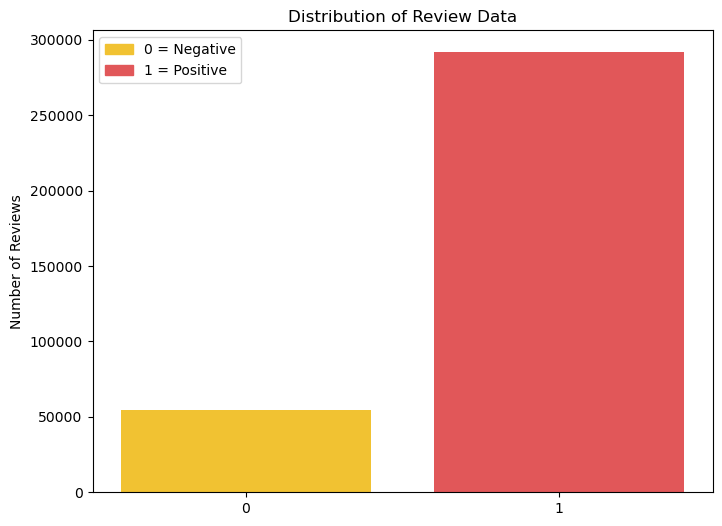

In [28]:
import matplotlib.pyplot as plt

# Assuming df['label'] contains the 1s and 0s
label_counts = df['label'].value_counts()
# Define the colors for the bar chart
colors = ['#E15759', '#F1C232']  # Tableu red for 1 and Tableu yellow for 0
plt.figure(figsize=(8, 6))

# Create a bar chart
plt.bar(label_counts.index, label_counts.values, color=[colors[0] if label == 1 else colors[1] for label in label_counts.index])
plt.xticks(ticks=[0, 1], labels=['0', '1'])

# Add labels and title
#plt.xlabel('0 = Negative, 1 = Positive')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Review Data')
plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color='#F1C232'), plt.Rectangle((0, 0), 1, 1, color='#E15759')],
           labels=['0 = Negative', '1 = Positive'], loc='upper left')

# Show the chart
plt.show()

In [15]:
from sklearn.utils import resample

# 클래스 0과 클래스 1을 분리
df_majority = sdf[sdf['label'] == 1]  # 클래스 1
df_minority = sdf[sdf['label'] == 0]  # 클래스 0

# 클래스 1을 클래스 0의 샘플 수로 언더샘플링
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # 샘플을 중복하지 않음
                                   n_samples=54860,  # 클래스 0과 동일한 수로 줄임
                                   random_state=42)  # 결과의 재현성을 위한 시드 값

# 두 클래스 다시 결합
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# 언더샘플링된 데이터프레임의 클래스 비율 확인
df_downsampled['label'].value_counts()

label
1.0    54860
0.0    54860
Name: count, dtype: int64

In [16]:
df_downsampled

,contents,star,agree,date,label
197127,Duolingo teach me alot of words!! I love Duoli...,5,0,2024-07-12 21:50:59,1.0
343446,I love it! I make the flash cards on my laptop...,5,0,2016-03-22 02:34:32,1.0
140912,SO COOL,5,0,2018-02-20 06:43:02,1.0
249157,useful,5,0,2020-11-19 15:37:09,1.0
77475,they offer easiest way to learn ..its like a g...,5,0,2024-07-29 21:15:36,1.0
...,...,...,...,...,...
368666,i have so much anger in me i click shcool i pu...,1,0,2022-11-04 21:01:36,0.0
368682,Thought it was a free app just an advertisemen...,1,0,2016-07-09 07:14:15,0.0
368684,New updates make this app a lot more annoying....,1,0,2021-04-29 03:18:50,0.0
368685,THE WORST! If I could rate it any less I would...,1,0,2021-04-26 02:48:46,0.0


In [17]:
df_downsampled.to_csv('IMCOM_Edtech_apps.csv', index=False, encoding='utf-8-sig')

In [4]:
df =pd.read_csv('data\\IMCOM_Edtech_apps(prepro전).csv')
df

,contents,star,agree,date,label
0,Duolingo teach me alot of words!! I love Duoli...,5,0,2024-07-12 21:50:59,1.0
1,I love it! I make the flash cards on my laptop...,5,0,2016-03-22 02:34:32,1.0
2,SO COOL,5,0,2018-02-20 06:43:02,1.0
3,useful,5,0,2020-11-19 15:37:09,1.0
4,they offer easiest way to learn ..its like a g...,5,0,2024-07-29 21:15:36,1.0
...,...,...,...,...,...
109715,i have so much anger in me i click shcool i pu...,1,0,2022-11-04 21:01:36,0.0
109716,Thought it was a free app just an advertisemen...,1,0,2016-07-09 07:14:15,0.0
109717,New updates make this app a lot more annoying....,1,0,2021-04-29 03:18:50,0.0
109718,THE WORST! If I could rate it any less I would...,1,0,2021-04-26 02:48:46,0.0


In [ ]:
from spacy.lang.en import English
from spacy.tokenizer import Tokenizer
from spacy.symbols import ORTH
from spacy.tokens import Doc
from spacy import displacy
from spacy.language import Language
nlp = spacy.load("en_core_web_sm")
lemmatizer = nlp.get_pipe('lemmatizer')
lemmatizer.mode
stopwords = nlp.Defaults.stop_words

In [5]:
def preprocess(text):    
    text = re.sub(r'http[s]?://\S+|www\.\S+', '', text) # 홈페이지 주소 제거
    text = re.sub(r'\b\S+\.com\b', '', text) # 홈페이지 주소 제거
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text) # 메일 주소 제거
    text = re.sub(r'<[^>]+>', '', text) # 캡션 내용 제거
    text = re.sub(r'[\u3000-\u303F\u4E00-\u9FFF\u3400-\u4DBF\uF900-\uFAFF\u3040-\u309F\u30A0-\u30FF]', '', text) # 한글, 일본어, 중국어 제거
    text = re.sub(r'[^\x00-\x7F]+', '', text) # 한글, 한자 추가 제거
    text = re.sub(r'\b\d{1,3}(,\d{3})*(\.\d+)?\b', '', text) #모든 숫자 제거
    text = re.sub(r'[^A-Za-z\s]', '', text) # 특수기호 제거
    text = re.sub(r'[.,?!]', '', text) # 마침표 제거
    text = re.sub(r'\s+', ' ', text)  # 공백 통일
    text = text.lower()
    # 텍스트를 Spacy의 NLP 파이프라인에 통과시킴
    doc = nlp(text)
    
    # Lemmatization과 stopwords 제거
    processed_text = " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])
    
    return processed_text
    

In [6]:
tqdm.pandas()
df['prepro'] = df['contents'].progress_apply(preprocess)

100%|██████████| 109720/109720 [08:40<00:00, 210.94it/s]


In [7]:
df = df.drop(columns=['contents','agree','star'])
df = df.dropna()
df

,date,label,prepro
0,2024-07-12 21:50:59,1.0,duolingo teach alot word love duolingo
1,2016-03-22 02:34:32,1.0,love flash card laptop study phone tablet
2,2018-02-20 06:43:02,1.0,cool
3,2020-11-19 15:37:09,1.0,useful
4,2024-07-29 21:15:36,1.0,offer easy way learn like game fun learn
...,...,...,...
109715,2022-11-04 21:01:36,0.0,anger click shcool class code will not let click
109716,2016-07-09 07:14:15,0.0,think free app advertisement website need pay ...
109717,2021-04-29 03:18:50,0.0,new update app lot annoying clear attempt typi...
109718,2021-04-26 02:48:46,0.0,bad rate ve see try simple translation lesson ...


In [13]:
df.isna().sum()

date      0
label     0
prepro    0
dtype: int64

In [14]:
dffi = df[df['prepro'].str.split().str.len()>2]
dffi

,date,label,prepro
0,2024-07-12 21:50:59,1.0,duolingo teach alot word love duolingo
1,2016-03-22 02:34:32,1.0,love flash card laptop study phone tablet
4,2024-07-29 21:15:36,1.0,offer easy way learn like game fun learn
6,2018-09-25 18:03:11,1.0,great tool bulde vocabulary personally not fee...
7,2016-10-19 07:06:20,1.0,love game lot good game wish game like game fu...
...,...,...,...
109715,2022-11-04 21:01:36,0.0,anger click shcool class code will not let click
109716,2016-07-09 07:14:15,0.0,think free app advertisement website need pay ...
109717,2021-04-29 03:18:50,0.0,new update app lot annoying clear attempt typi...
109718,2021-04-26 02:48:46,0.0,bad rate ve see try simple translation lesson ...


In [15]:
dffi['label'].value_counts()

label
0.0    42472
1.0    37422
Name: count, dtype: int64

In [22]:
dffi.to_csv('IMCOM_Edtech_apps(prepro후).csv', index=False,encoding='utf-8-sig')

In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from tqdm import tqdm
import pandas as pd
import re
import os
import spacy

In [2]:
df = pd.read_csv('IMCOM_Edtech_apps(prepro후).csv')

In [3]:
# VADER 분석기 초기화
vader_analyzer = SentimentIntensityAnalyzer()

vader_analyzer = SentimentIntensityAnalyzer()

# VADER 감정 분석 함수 수정: 벡터 값 반환
def vader_sentiment(text):
    score = vader_analyzer.polarity_scores(text)
    # 'compound' 점수를 벡터로 반환
    return score['compound']

# TextBlob 감정 분석 함수 수정: 벡터 값 반환
def textblob_sentiment(text):
    score = TextBlob(text).sentiment.polarity
    # Polarity 점수를 벡터로 반환
    return score

tqdm.pandas()
# 감정 분석 적용
df['VD_senti'] = df['prepro'].progress_apply(vader_sentiment)
df['TB_senti'] = df['prepro'].progress_apply(textblob_sentiment)

100%|██████████| 79894/79894 [00:07<00:00, 10680.92it/s]


In [4]:
df

,date,label,prepro,VD_senti,TB_senti
0,2024-07-12 21:50:59,1.0,duolingo teach alot word love duolingo,0.6369,0.500000
1,2016-03-22 02:34:32,1.0,love flash card laptop study phone tablet,0.6369,0.500000
2,2024-07-29 21:15:36,1.0,offer easy way learn like game fun learn,0.8271,0.111111
3,2018-09-25 18:03:11,1.0,great tool bulde vocabulary personally not fee...,0.7108,0.100000
4,2016-10-19 07:06:20,1.0,love game lot good game wish game like game fu...,0.9747,0.080000
...,...,...,...,...,...
79889,2022-11-04 21:01:36,0.0,anger click shcool class code will not let click,-0.5719,-0.700000
79890,2016-07-09 07:14:15,0.0,think free app advertisement website need pay ...,0.7351,0.400000
79891,2021-04-29 03:18:50,0.0,new update app lot annoying clear attempt typi...,-0.5719,-0.086742
79892,2021-04-26 02:48:46,0.0,bad rate ve see try simple translation lesson ...,-0.5106,-0.095000


In [5]:
df.to_csv('IMCOM_Edtech_apps(prepro+sentiment).csv', index=False, encoding='utf-8-sig')